# iris基本

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9464285714285714
0.868421052631579


# 交差検証あり

In [6]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled =  scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.01, 0.1, 1, 10, 100],
              "gamma": [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [10]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
grid_search.score(X_train_scaled, y_train)

0.9835680751173709

In [12]:
grid_search.score(X_test_scaled, y_test)

0.972027972027972

# ニューラルネットワーク
- 指定されたネットワークを構築する

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plot_train_val_loss(history):
    """エポックごとの損失の可視化"""
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

In [15]:
def plot_train_val_acc(history):
    """エポックごとのAccuracyの可視化"""
    train_acc = history.history["acc"]
    val_acc = history.history["val_acc"]

    epochs = range(1, len(train_acc) + 1)

    plt.plot(epochs, train_acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "r", label="Validation acc")
    
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.0)
    plt.legend()

    plt.show()

In [16]:
from keras.datasets import mnist

(X_trainval, y_trainval), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=0)

In [18]:
# 学習曲線を分かりやすくするために学習データを減らしている
X_train = X_train[:1000]
y_train = y_train[:1000]

X_train.shape, y_train.shape

((1000, 28, 28), (1000,))

In [19]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255

X_val = X_val.reshape((X_val.shape[0], 28 * 28))
X_val = X_val.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255

In [20]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [21]:
from keras import layers, models
from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop

model = models.Sequential()

# 層を1つ追加(隠れ層その1): 16次元 全結合  活性化関数はReLU 784次元の入力を受け取る
model.add(layers.Dense(16, activation="relu", input_shape=(784,)))

# 層を1つ追加(隠れ層その2): 32次元 全結合  活性化関数はReLU 入力の次元はkerasが勝手に判断
model.add(layers.Dense(32, activation="relu"))

# 層を1つ追加(出力層(=最終層)): 10次元 全結合 活性化関数はSoftmax 入力の次元はkerasが勝手に判断
model.add(layers.Dense(10, activation="softmax"))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer=RMSprop(lr=0.001),  # 最適化アルゴリズム: RMSProp / 学習率: 0.001
              loss=categorical_crossentropy,# 損失関数: カテゴリカル交差エントロピー
              metrics=["accuracy"])         # 評価指標: 正答率

In [24]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    verbose=1)

Train on 1000 samples, validate on 15000 samples
Epoch 1/20
1000/1000 [==============================] - 0s 323us/step - loss: 2.0636 - acc: 0.3080 - val_loss: 1.8172 - val_acc: 0.4879
Epoch 2/20
1000/1000 [==============================] - 0s 160us/step - loss: 1.5279 - acc: 0.6410 - val_loss: 1.3767 - val_acc: 0.6668
Epoch 3/20
1000/1000 [==============================] - 0s 146us/step - loss: 1.1143 - acc: 0.7680 - val_loss: 1.0383 - val_acc: 0.7407
Epoch 4/20
1000/1000 [==============================] - 0s 138us/step - loss: 0.8335 - acc: 0.8170 - val_loss: 0.8267 - val_acc: 0.7833
Epoch 5/20
1000/1000 [==============================] - 0s 139us/step - loss: 0.6557 - acc: 0.8310 - val_loss: 0.7120 - val_acc: 0.8031
Epoch 6/20
1000/1000 [==============================] - 0s 152us/step - loss: 0.5455 - acc: 0.8510 - val_loss: 0.6763 - val_acc: 0.7959
Epoch 7/20
1000/1000 [==============================] - 0s 156us/step - loss: 0.4701 - acc: 0.8750 - val_loss: 0.5925 - val_acc: 0.8215

In [25]:
history.model.evaluate(X_train, y_train)

1000/1000 [==============================] - 0s 11us/step


[0.11139042282104492, 0.982]

In [26]:
history.model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 8us/step


[0.4526213383436203, 0.8675]

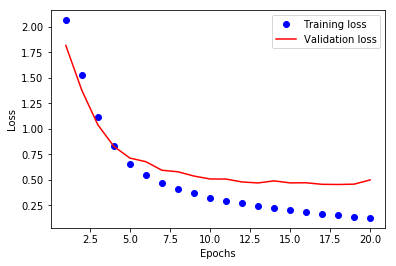

In [27]:
# 可視化
plot_train_val_loss(history)

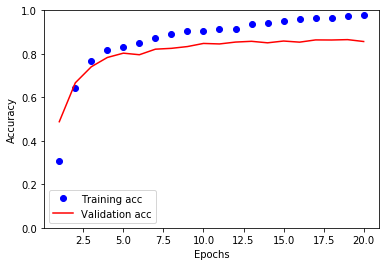

In [28]:
plot_train_val_acc(history)

# CNN
- 指定されたネットワークを構築する


In [29]:
import matplotlib.pyplot as plt

In [30]:
def plot_train_val_loss(history):
    """エポックごとの損失の可視化"""
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

In [31]:
def plot_train_val_acc(history):
    """エポックごとのAccuracyの可視化"""
    train_acc = history.history["acc"]
    val_acc = history.history["val_acc"]

    epochs = range(1, len(train_acc) + 1)

    plt.plot(epochs, train_acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "r", label="Validation acc")
    
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.0)
    plt.legend()

    plt.show()

In [32]:
from keras.datasets import mnist

(X_trainval, y_trainval), (X_test, y_test) = mnist.load_data()

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=0)

In [34]:
# 学習曲線を分かりやすくするために学習データを減らしている
X_train = X_train[:1000]
y_train = y_train[:1000]

X_train.shape, y_train.shape

((1000, 28, 28), (1000,))

In [35]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_train = X_train.astype("float32") / 255

X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))
X_val = X_val.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_test = X_test.astype("float32") / 255

In [36]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [37]:
from keras import backend, layers, models

backend.clear_session()

# ネットワークの初期化
model = models.Sequential()

model.add(layers.Conv2D(filters=32, # 畳み込み演算によって計算するフィルタの数
                        kernel_size=(3, 3),
                        padding="valid", # パディングなし
                        activation="relu",
                        input_shape=(28, # image_height
                                     28, # image_width
                                     1)  # channel
                       )) 

model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64,
                        kernel_size=(3, 3),
                        activation="relu"))
                                                                                
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64,
                        kernel_size=(3, 3),
                        activation="relu"))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [38]:
#モデルをコンパイル
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [39]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val, y_val))

Train on 1000 samples, validate on 15000 samples
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1.8762 - acc: 0.3940 - val_loss: 1.3320 - val_acc: 0.5921
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9262 - acc: 0.7220 - val_loss: 0.7246 - val_acc: 0.7977
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5949 - acc: 0.8130 - val_loss: 0.5650 - val_acc: 0.8255
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4618 - acc: 0.8580 - val_loss: 0.5272 - val_acc: 0.8351
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3618 - acc: 0.8990 - val_loss: 0.4549 - val_acc: 0.8632
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3205 - acc: 0.9010 - val_loss: 0.4926 - val_acc: 0.8407
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2647 - acc: 0.9180 - val_loss: 0.4989 - val_acc: 0.8416
Epoch 8/10
10

In [40]:
model.evaluate(X_train, y_train)

1000/1000 [==============================] - 0s 99us/step


[0.44046779841184613, 0.858]

In [41]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 112us/step


[0.5962528380692005, 0.8206]

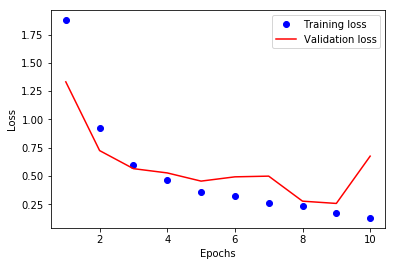

In [42]:
# 可視化
plot_train_val_loss(history)

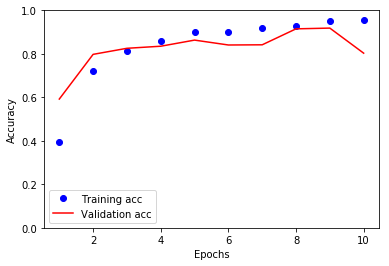

In [43]:
plot_train_val_acc(history)